In [23]:
import matplotlib.pyplot as plt
import pandas as pd


# folder date
data
    |
    timestamp
        |
        base
        | 
        test1
        |
        test2
            |
            Golang
            |
            python
                |
                mergesort
                |
                quicksort
                        |
                        timmings
                        | 
                        dtlb-1.csv
                        |
                        dtlb-2.csv
                        |
                        dtlb-..csv
                        |
                        dtlb-base.csv
                        |
                        caceh-1.csv

                        

            

In [24]:
test_folder_names = ["2024-05-02-10-25-11"]

test_languages = ["golang","c_plus_plus", "pypy" ,"cpython",]

test_algorithm = ["mergesort","quicksort"]

test_data_measurments = ["perf-dTLB-misses","perf-cache-miss","timings", "timings-relative"]

test_data_type = ["Full shuffled list", "Partially shuffled list", ] # "Reversed list", "Sorted list"]

test_repeats = 8

base_dict = {}


# Read and make avearage time for base cases


In [25]:

for measurement in test_data_measurments:

    for i in range(1,len(test_data_type)): # test data type
        
        for algorithm in test_algorithm:
            id = 0
            baseDataFrame = pd.DataFrame()
            
            for language in test_languages:     
            
                temp = []
                df = pd.DataFrame({'2': [], '4': [], '8': [], '16': [], '32': [], '64': []})
            
                for testnum in range(1,test_repeats+1):
                    test_name = measurement if measurement != "timings-relative" else "timings"
                    base_path = "../data/{}/base-{}/{}/{}/{}-base.csv".format(test_folder_names[0],testnum, language, algorithm, test_name)
                    base_file = pd.read_csv(base_path,header=None)
                    #print("DEBUG: Lan {}, Algo {}, {}, testnum: {}".format(language, algorithm, measurement,testnum))
                    base_file.columns = ['2', '4', '8', '16', '32', '64']
                                    
                    temp.append(base_file)
                    

                df = pd.concat(temp, ignore_index=True)
                mean_values = df.median()
                # Convert mean_values to a DataFrame
                

                mean_df = pd.DataFrame(mean_values, columns=[language])
            
                # Display the new DataFrame
                baseDataFrame.insert(id,language, mean_df)
                id += 1
            
            
            #print("DEBUG: Algo {}, Measure {}, data type {}".format( algorithm, measurement,i))
            #display(baseDataFrame)
            base_dict[(algorithm, measurement)] = baseDataFrame
#print(base_dict)

        

# Read and make avarage time


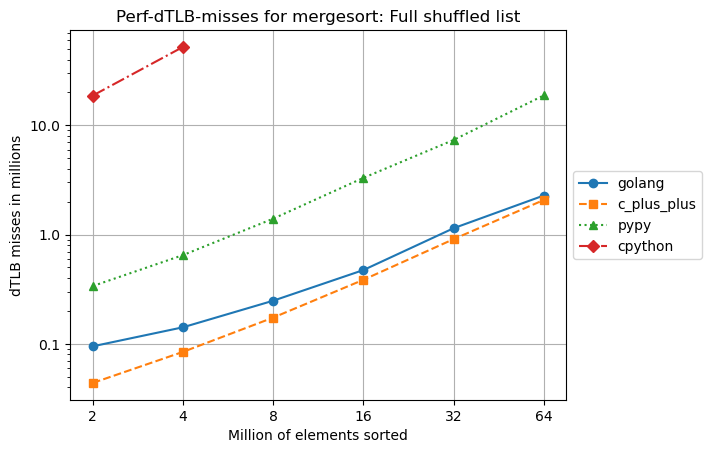

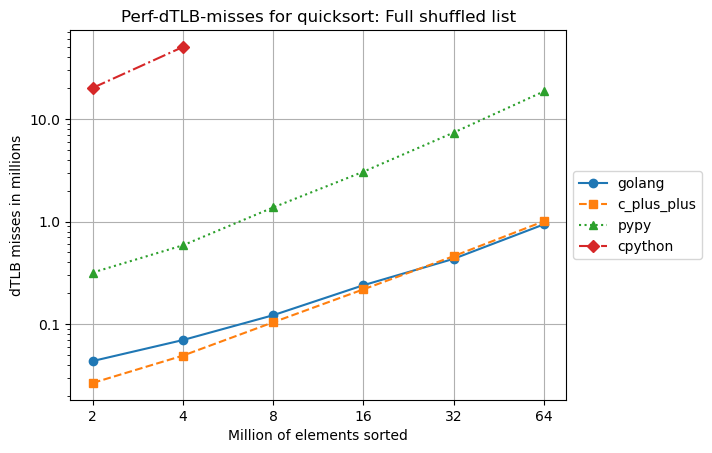

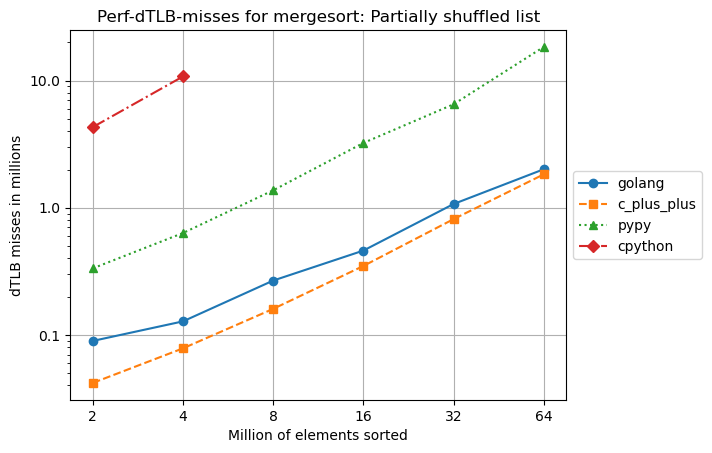

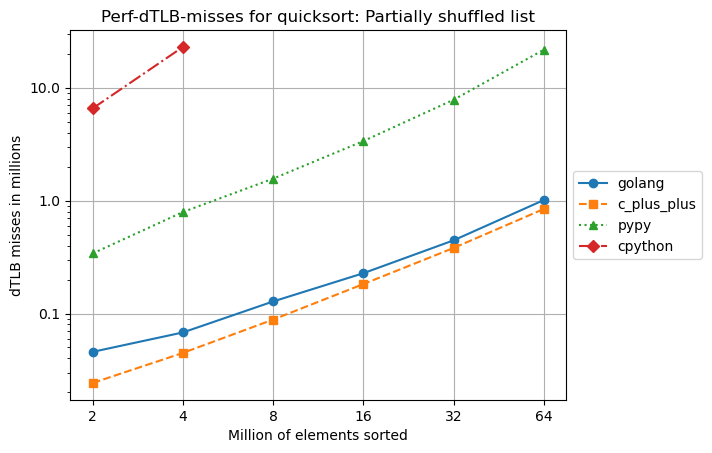

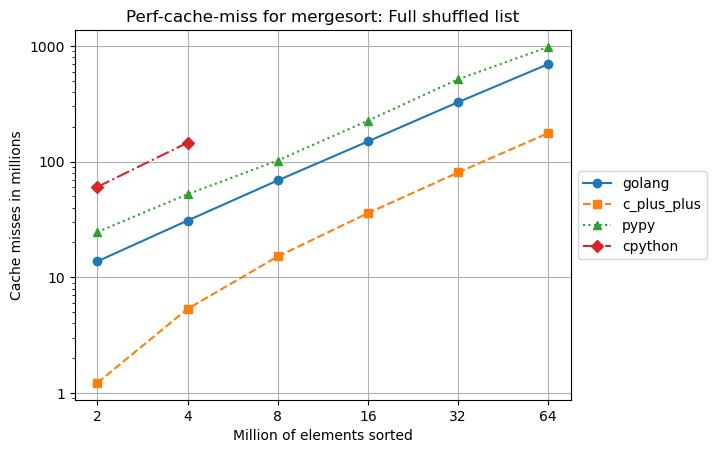

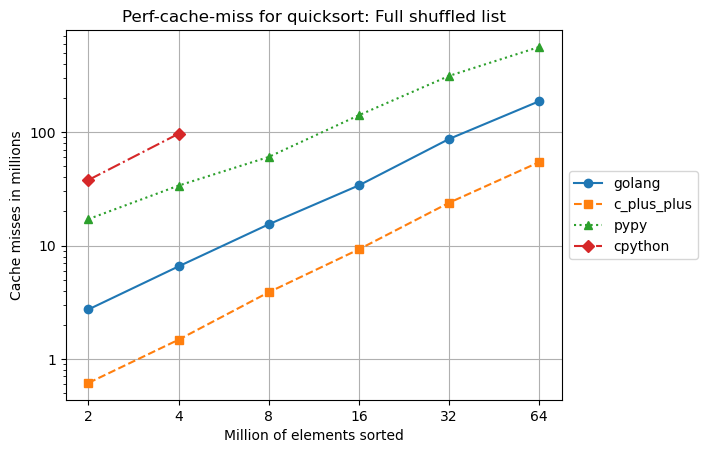

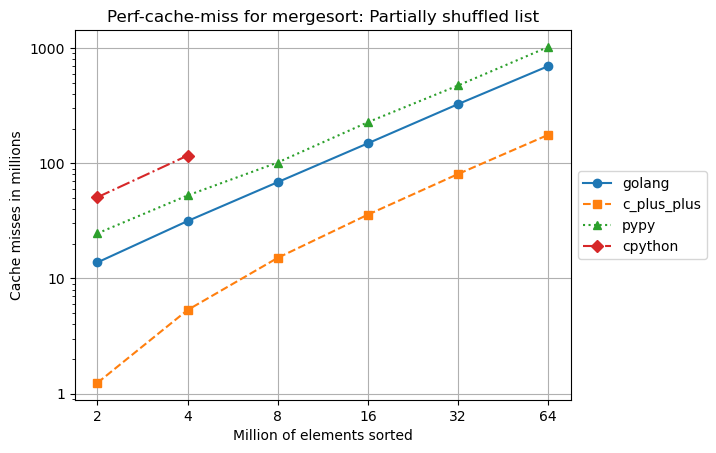

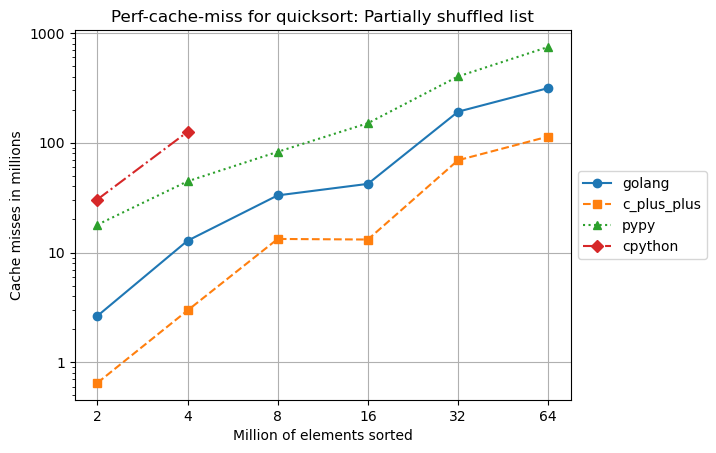

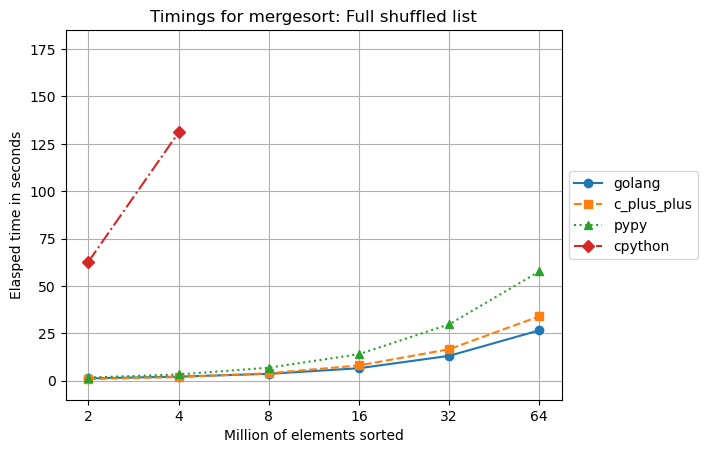

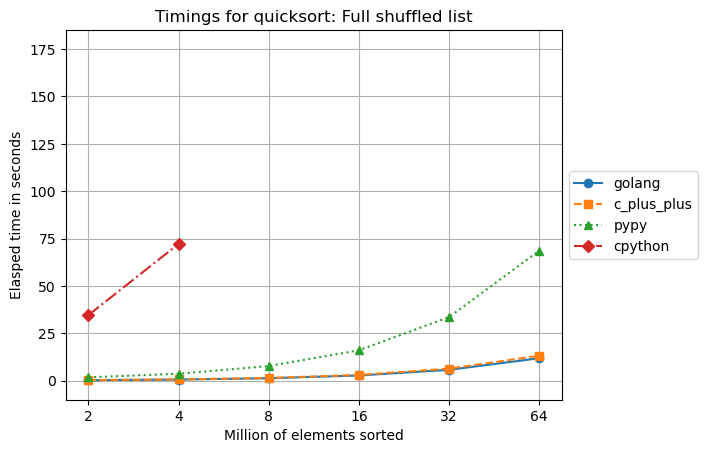

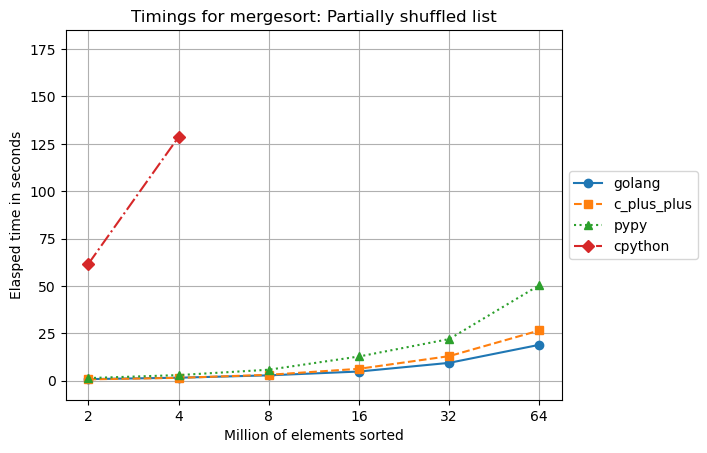

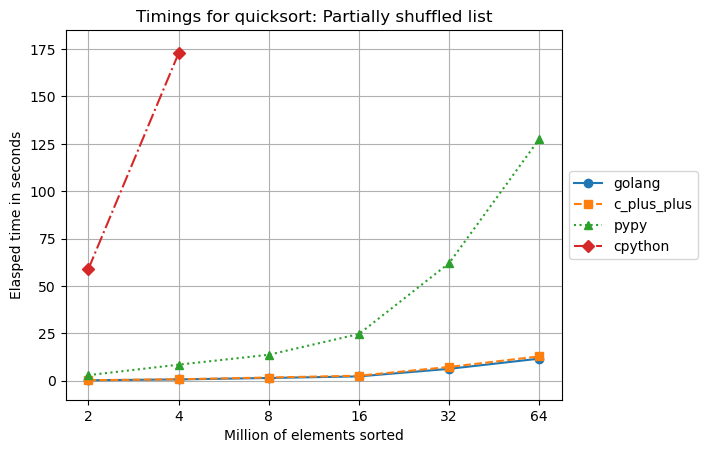

2     1.598265
4     1.835199
8     2.189317
16    2.417688
32    2.431309
64    2.405472
Name: golang, dtype: float64
2      1.251357
4      2.179600
8      3.654107
16     6.617892
32    13.161633
64    26.606004
Name: golang, dtype: float64
2     2.092160
4     2.059016
8     2.018364
16    1.980093
32    1.923839
64    1.881010
Name: c_plus_plus, dtype: float64
2      0.955950
4      1.942675
8      3.963605
16     8.080430
32    16.633408
64    34.024267
Name: c_plus_plus, dtype: float64
2     1.173479
4     1.199740
8     1.160198
16    1.139619
32    1.074908
64    1.109499
Name: pypy, dtype: float64
2      1.704334
4      3.334057
8      6.895373
16    14.039782
32    29.769986
64    57.683674
Name: pypy, dtype: float64
2      0.03182
4     0.030528
8          NaN
16         NaN
32         NaN
64         NaN
Name: cpython, dtype: object
2      62.853419
4     131.025462
8            NaN
16           NaN
32           NaN
64           NaN
Name: cpython, dtype: object


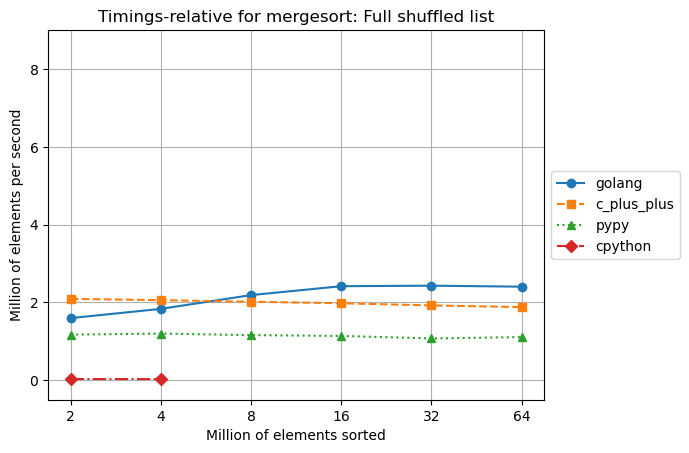

2     6.817032
4     6.162921
8     5.943182
16    5.730565
32    5.534764
64    5.380316
Name: golang, dtype: float64
2      0.293383
4      0.649043
8      1.346080
16     2.792046
32     5.781637
64    11.895212
Name: golang, dtype: float64
2     5.953456
4     5.609226
8     5.416722
16    5.219949
32    4.988004
64    4.838567
Name: c_plus_plus, dtype: float64
2      0.335939
4      0.713111
8      1.476908
16     3.065164
32     6.415392
64    13.227055
Name: c_plus_plus, dtype: float64
2     1.093249
4     1.085433
8     1.027712
16    0.994969
32    0.952132
64    0.931386
Name: pypy, dtype: float64
2      1.829409
4      3.685165
8      7.784285
16    16.080908
32    33.608785
64    68.714819
Name: pypy, dtype: float64
2      0.05771
4     0.055382
8          NaN
16         NaN
32         NaN
64         NaN
Name: cpython, dtype: object
2     34.655805
4     72.225415
8           NaN
16          NaN
32          NaN
64          NaN
Name: cpython, dtype: object


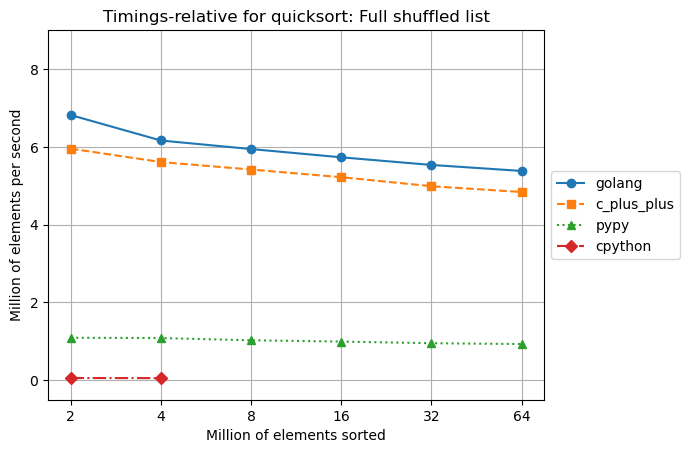

2     2.294653
4     2.487427
8     2.791581
16    3.278477
32    3.386129
64    3.373732
Name: golang, dtype: float64
2      0.871592
4      1.608087
8      2.865759
16     4.880315
32     9.450319
64    18.970089
Name: golang, dtype: float64
2     2.656071
4     2.598534
8     2.550015
16    2.534828
32    2.463200
64    2.411580
Name: c_plus_plus, dtype: float64
2      0.752992
4      1.539330
8      3.137236
16     6.312066
32    12.991231
64    26.538616
Name: c_plus_plus, dtype: float64
2     1.408069
4     1.337123
8     1.371679
16    1.249248
32    1.454817
64    1.269013
Name: pypy, dtype: float64
2      1.420385
4      2.991497
8      5.832268
16    12.807710
32    21.995895
64    50.432897
Name: pypy, dtype: float64
2     0.032399
4     0.031089
8          NaN
16         NaN
32         NaN
64         NaN
Name: cpython, dtype: object
2      61.730931
4     128.662234
8            NaN
16           NaN
32           NaN
64           NaN
Name: cpython, dtype: object


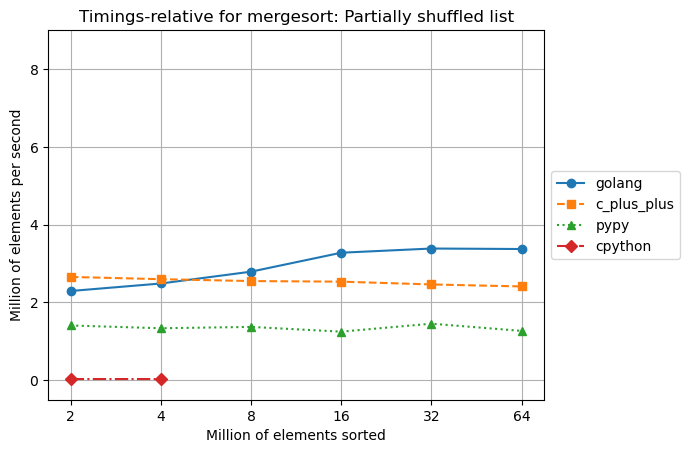

2     8.096568
4     5.589376
8     5.452877
16    6.923790
32    5.073300
64    5.480205
Name: golang, dtype: float64
2      0.247018
4      0.715643
8      1.467116
16     2.310873
32     6.307532
64    11.678396
Name: golang, dtype: float64
2     6.861598
4     5.001086
8     4.654281
16    5.977753
32    4.397583
64    4.967179
Name: c_plus_plus, dtype: float64
2      0.291477
4      0.799826
8      1.718848
16     2.676591
32     7.276724
64    12.884578
Name: c_plus_plus, dtype: float64
2     0.674182
4     0.470692
8     0.583223
16    0.648290
32    0.515417
64    0.501537
Name: pypy, dtype: float64
2       2.966556
4       8.498127
8      13.716890
16     24.680322
32     62.085698
64    127.607849
Name: pypy, dtype: float64
2     0.033867
4     0.023146
8          NaN
16         NaN
32         NaN
64         NaN
Name: cpython, dtype: object
2      59.054642
4     172.818474
8            NaN
16           NaN
32           NaN
64           NaN
Name: cpython, dtype: object


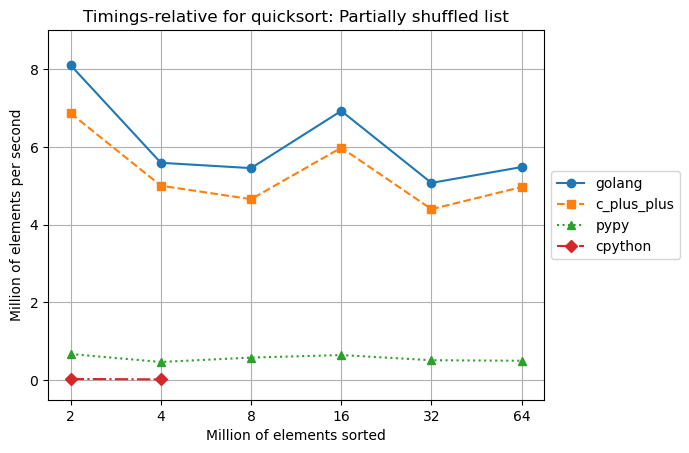

In [35]:

import math
import matplotlib.ticker as mticker
for measurement in test_data_measurments:

    test_name = measurement if measurement != "timings-relative" else "timings"
    for i in range(1,len(test_data_type)+1): # test data type
        
        
        for algorithm in test_algorithm:
            id = 0
            asd = pd.DataFrame()
            
            for language in test_languages:     
            
                temp = []
                df = pd.DataFrame({'2': [], '4': [], '8': [], '16': [], '32': [], '64': []})
            
                for testnum in range(1,test_repeats+1):
                    
                

                    path = "../data/{}/test-{}/{}/{}/{}-{}.csv".format(test_folder_names[0], testnum, language, algorithm, test_name,i)
                    file = pd.read_csv(path,header=None)
                    #print("DEBUG: Lan {}, Algo {}, {}, testnum: {}".format(language, algorithm, measurement,testnum))
                    if language == "cpython":
                        file.insert(2,2,[None])
                        file.insert(3,3,[None])
                        
                        file.insert(4,4,[None])
                        file.insert(5,5,[None])
                        
                        
                    file.columns = ['2', '4', '8', '16', '32', '64']
                                    
                    temp.append(file)
                    

                df = pd.concat(temp, ignore_index=True)
                
                mean_values = df.mean()
                if test_name == "timings":
                    mean_values = mean_values.sub(base_dict[(algorithm, test_name)][language])
                    
                # Convert mean_values to a DataFrame
                

                mean_df = pd.DataFrame(mean_values, columns=[language])
            
                # Display the new DataFrame
                asd.insert(id,language, mean_df)
                id += 1
            
            # print("----------------")
            # display(asd)
            
           # asd = asd.sub(base_dict[algorithm, measurement])
            # display(asd)
            # print("----------------")
            
            
            # print("DEBUG: Lan {}, Algo {}, Measure {}, data type {}".format(language, algorithm, measurement,i))
          
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

            line_styles = ['-', '--', ':', '-.']

            marker_styles = ['o', 's', '^', 'D']

            million_measurements = ["perf-dTLB-misses","perf-cache-miss"]
            for x, column in enumerate(asd.columns):
                if measurement == "timings-relative":
                    customASD = asd.copy(deep=True)
                    for amount in asd[column].keys():
                        time = asd[column][amount]
                        if math.isnan(time):
                            continue
                        customASD.loc[amount, column] = (int(amount) / time)
                    customASD[column].plot(color=colors[x], linestyle=line_styles[x], marker=marker_styles[x], label=column)
                    print(customASD[column])
                    print(asd[column])
                elif measurement in million_measurements:
                    customASD = asd.copy(deep=True)
                    for amount in asd[column].keys():
                        value = asd[column][amount]
                        if math.isnan(value):
                            continue
                        customASD.loc[amount, column] = value/pow(10,6)
                    customASD[column].plot(color=colors[x], linestyle=line_styles[x], marker=marker_styles[x], label=column)
                else:
                    asd[column].plot(color=colors[x], linestyle=line_styles[x], marker=marker_styles[x], label=column)


            plt.title("{} for {}: {}".format(measurement[0].upper() + measurement[1:],algorithm,test_data_type[i-1]))
            plt.xlabel("Million of elements sorted")
            
            if(measurement == "perf-dTLB-misses"):
                plt.ylabel("dTLB misses in millions")
                plt.yscale("log")
            elif(measurement == "perf-cache-miss"):
                plt.ylabel("Cache misses in millions")
                plt.yscale("log")
                
            elif(measurement == "timings"):
                plt.ylabel("Elasped time in seconds")
                plt.ylim(-10, 185)
            elif(measurement == "timings-relative"):
                plt.ylabel("Million of elements per second")
                plt.ylim(-0.5,9)
                
            else:
                plt.ylabel(measurement)    
            plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
            plt.grid()
            plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
            plt.show()
            
            del asd
        
    
            
